<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Quantum-Information-Processing/blob/main/Week%201/Block%205/PhysicsReboot_prepaQiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

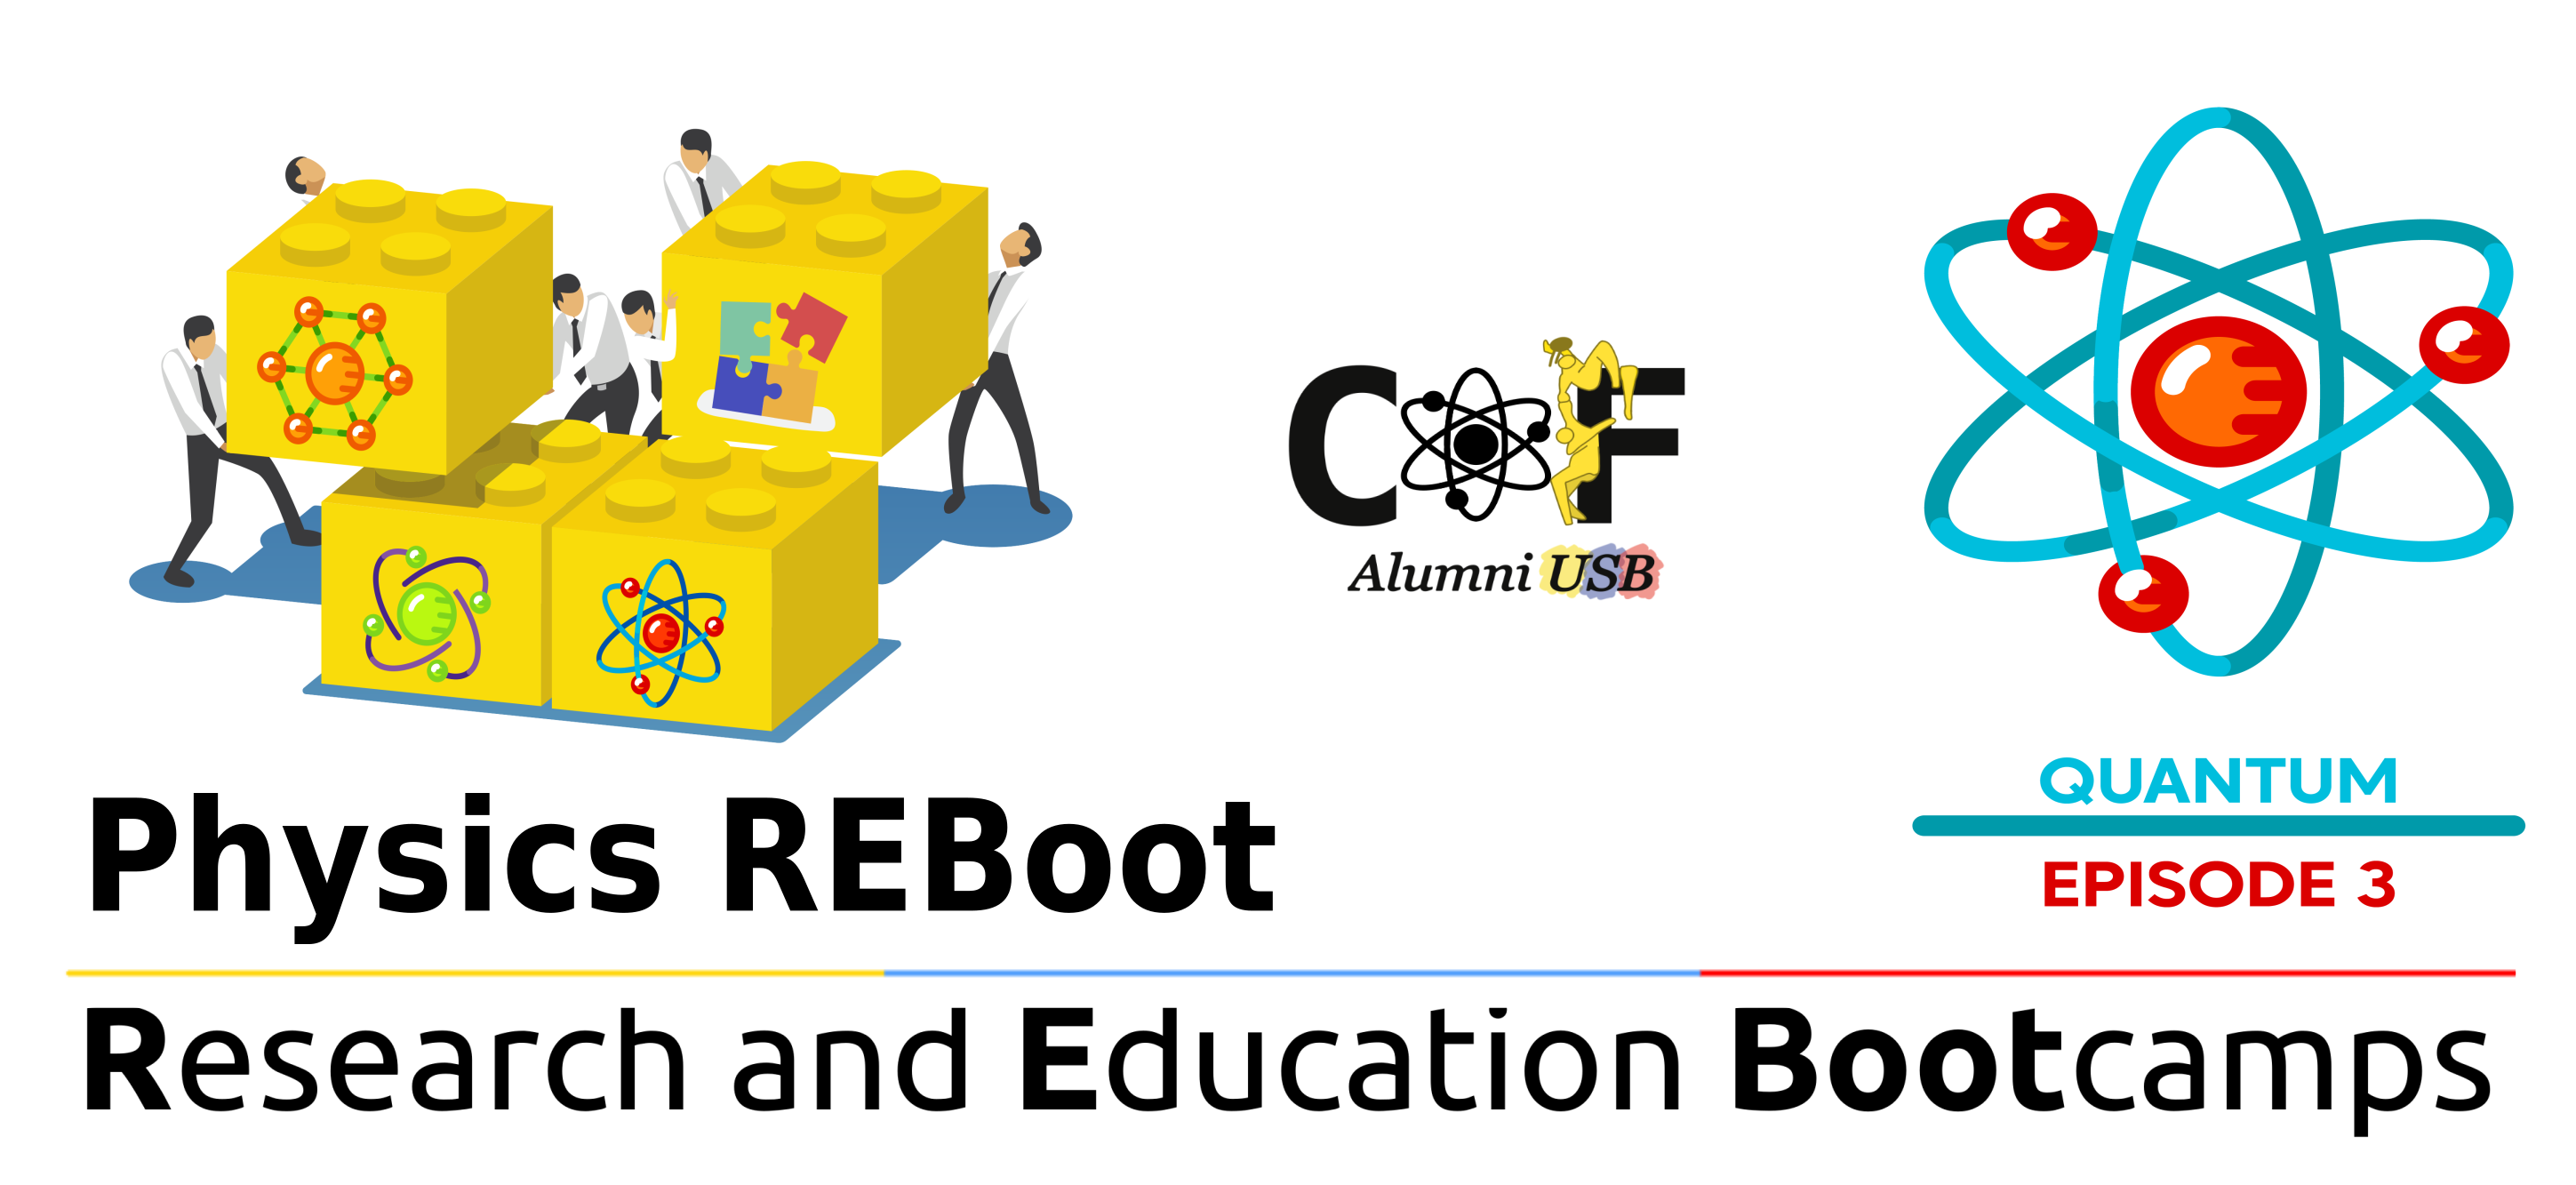



# Physics REBoot Venezuela: Quantum Computing
# Prepa de Qiskit #1


# Preámbulo



Comenzaremos importando Qiskit (qkt) y numpy (np)

In [ ]:
#For Python and advanced manipulation import these packages
try:
  import numpy as np
except:
  !pip install numpy
  import numpy as np


try:
  import qiskit as qkt
except:
  !pip install qiskit
  import qiskit as qkt

try:
  !pip install pylatexenc
  ot = 'mpl'
  qkt.QuantumCircuit(1).draw(ot)
except:
  ot = 'text'

print('¡Preámbulo ejecutado correctamente!')
if ot=='text':
  print('\n Advertencia: ¡pylatex no fue instalado correctamente, por favor reinicia el kernel y ejecútalo de nuevo!')

#¿Cuál es el sistema cuántico más simple?

En informática, un dígito binario o "bit" es la unidad más básica de información que puede tomar uno de dos valores, sea 0  o 1. Físicamente, un bit puede ser cualquier sistema binario: las dos caras de una moneda, un punto o una raya en código Morse o simplemente la presencia o ausencia de un hueco en un papel. Cómunmente una computadora utiliza dos valores de corriente en un circuito eléctrico o dos orientaciones opuestas de un pequeño momento magnético (pensar en los polos de un imán).

Una serie binaria de bits lo suficientemente larga (por ejemplo: `a=01101000 011011110110110001100001`) puede codificar cualquier mensaje o información  (en nuestro ejemplo `a` es equivalente a `hola` en ASCII).

¿Cuál es el equivalente en información cuántica?

La respuesta es un sistema de dos níveles cuántico, usualmente llamado qubit o cúbit (bit cuántico) en español. Existen muchos ejemplos en mecánica cuántica: las dos proyecciones de un qubit sobre un eje, la presencia o ausencia de un electrón en un lugar del espacio,  las dos polarizaciones de la luz o incluso dos estados de un electrón en un átomo (estado fundamental o excitado).

Un bit cuántico, a diferencia de un bit clásico, no toma dos posibles valores sino que puede tomar cualquier superposición lineal entre el valor "cero" y el valor "uno"; en mecánica cuántica escribimos $|0\rangle$ o $|1\rangle$, respectivamente. Esto quiere decir que cualquier estado posible del qubit se escribe como

$$|\psi\rangle = z_0|0\rangle+z_1 |1\rangle $$

donde $z_0$ y $z_1$ son números complejos cualesquiera. O en notación vector de estado como 
$$|\psi\rangle = \begin{bmatrix}z_0 \\ z_1 \end{bmatrix}.$$

Nótese que $z_1$ y $z_2$ dependen del tiempo.

El dual se escribe $\langle \psi|=\langle 0|\bar{z}_0+\langle1|\bar{z}_1 $ o como un vector fila

$$\langle \psi |= [\bar{z}_0,\bar{z}_1]$$ 
donde $\bar{z}_0$ y $\bar{z}_1$ son los complejos conjugado de $z_0$ y de $z_1$, respectivamente.



## Postulados de un sistema de dos níveles
Aquí repasamos algunos de los postulados de la mecánica cuántica[1] aplicados a un qubit
1. Toda la física del qubit está definido por su estado $|\psi\rangle$.
2. Las únicos valores que se pueden medir son los cantidades físicas relacionadas a $|0\rangle$ o a $|1\rangle$
3. Si el estado está **normalizado**
$$|z_0|^2+|z_1|^2=1,$$
la probabilidad de medir el valor asociado $|0\rangle$ y a $|1\rangle$ están dadas por $$P(0)=|\langle \psi |0\rangle|^2=|z_0|^2$$ y $$P(1)=|\langle \psi |1\rangle|^2=|z_1|^2$$, respectivamente.
4. Toda propiedad que podemos medir de un qubit esta definida por un operador hermítico $A$ que actúa sobre $|\psi\rangle$. El valor esperado de $A$ está dado por $\langle\psi| A|\psi\rangle$.
5. **Postulado de la medida** Después de una medida, si el resultado es el valor asociado a $|0\rangle$, el valor de $|\psi\rangle$ después de la medida es $|0\rangle$. Después de una medida, si el resultado es el valor asociado a $|1\rangle$, el valor de $|\psi\rangle$ después de la medida es $|0\rangle$.
6. La evolución del estado en tiempo está dada por la **ecuación de Schrödinger** (no la trataremos en esta prepa)


### Visualización

Una fase global $|\psi\rangle \to \mathrm{e}^{\mathrm i \varphi}|\psi\rangle$ no cambia el los resultados de los postulados 3,4 y 5, donde $\mathrm{e}^{\mathrm i \varphi}=\cos(\varphi)+\mathrm i \sin(\varphi)$ e $\mathrm i^2=-1$.

En ese caso si 

$$|\psi\rangle=\begin{bmatrix}z_0 \\ z_1\end{bmatrix}$$

siempre podemos escoger uno de los coeficientes como real. Escogemos $z_0= a$ y $z_1=b+\mathrm i c$, donde $a,b,c$ son reales.

Por el postulado 3, solo nos interesa la versión normalizada del estado

$\langle\psi|\psi\rangle=|z_0|^2+|z_1|^2=a^2+|b+\mathrm i c|^2=a^2+b^2+c^2=1$.

¡Esta es la ecuación de la superficie de una esfera de radio 1! 

La esfera unitaria definida por todos los valores posibles de $a,b,c$ se conoce como la **esfera de Bloch**. 

**Esfera de Bloch en Qiskit**

La subdependencia `qiskit.visualization` contiene la función `plot_bloch_vector` que nos permite dibujar un vectores en una esfera unitaria. Por ejemplo,

In [ ]:
from qiskit.visualization import plot_bloch_vector

#Coloca valores cualquiera
x=0
y=0
z=-1

norma=np.sqrt(x**2+y**2+z**2) #claro hay que normalizarlos

plot_bloch_vector([x/norma,y/norma,z/norma])

Puedes jugar con los valores de $x,y,z$ y ver que sucede. Como podemos ver el polo norte de la esfera de Bloch representa el estado $|0\rangle$ y el polo sur el estado $|1\rangle$. El resto de posibles estados son todas las otras superposiciones.

Para mayor facilidad, cualquier estado a un qubit puede escribirse como un vector en la esfera de la manera siguiente

$$|\psi\rangle = \cos(\theta/2)|0\rangle+e^{i \varphi}\sin(\theta/2)|1\rangle=\begin{bmatrix}\cos(\theta/2)\\ e^{i \varphi}\sin(\theta/2)\end{bmatrix}$$

donde $\theta$ es el ángulo polar y $\varphi$ es el angulo azimutal en coordenadas esféricas.
Utilizando qiskit, solo hay que indicar el sistema de coordenadas:

In [ ]:
radio=1 #siempre es uno
theta=np.pi
phi=0

plot_bloch_vector([radio,theta,phi],coord_type="spherical")

puedes cambiar `theta` y `phi` para ver como cambia el estado.

Pero ¿qué tal si queremos usar $a,b,c$? bueno podemos utilizar otra función llamada `plot_bloch_statevector`,

In [ ]:
from qiskit.visualization import plot_bloch_multivector

a=10
b=(2+0.5j)

#No olvidemos normalizar
norma=np.sqrt(np.abs(a)**2+np.abs(b)**2)

estado=[a/norma,b/norma]
plot_bloch_multivector(estado)

## **Crear un qubit en Qiskit**

Para crear un circuito con un sólo qubit, inicializado al valor cero , $|\psi\rangle=|0\rangle $, usamos la funcion `QuantumCircuit(n)` donde `n=1` es el número de qubits. 

In [ ]:
n=1
miqubit=qkt.QuantumCircuit(n)

dónde `qubit` es nuestro circuito con un único qubit y `qkt` es el paquete de Qiskit.

Para visualizar el circuito podemos usar la propiedad `.draw()`

In [ ]:
miqubit.draw()

Como no hemos hecho ninguna operación no vemos nada en el circuito.

Para ejecutar el circuito, llamamos a un simulador. Los simuladores se encuentran en un subpaquete de Qiskit llamado `Aer`. Para un primer ejemplo, llamemos al simulador `statevector_simulator` usando `get_backend`

In [ ]:
from qiskit import Aer

simulador_estado=Aer.get_backend('statevector_simulator')

Ahora podemos executar el circuito usando nuestro simulador y la función `execute`:

In [ ]:
#Ejecutamos el sistema
ejecucion=qkt.execute(miqubit,simulador_estado)
#Pedimos los resultados
resultado=ejecucion.result()
#De los resultados extraemos el vector
estado=resultado.get_statevector()
#Lo graficamos
plot_bloch_multivector(estado)

Como esperabamos nuestro circuito produjo un qubit inicializado en el estado $|0\rangle$.

¿Qué pasa ahora si medimos?

Para poder medir necesitamos añadir un registro clásico al circuito y hacer la operación de medición. Para ello definimos un nuevo circuito dónde indicamos el número de bits clásicos y cuánticos

In [ ]:
n=1# numero de qubits clásicos
m=1# numero de bits clásicos

miqubit=qkt.QuantumCircuit(n,m)
miqubit.draw()


y para medir usamos la aplicación `.measure(x,y)`, donde `x` indica aplicar al qubit `x` y guardar el resultado en el bit `y`. En qiskit contamos comenzando desde 0. En este caso

In [ ]:
miqubit=qkt.QuantumCircuit(1,1)
miqubit.measure(0,0)
miqubit.draw(ot)

`ot` está definido en el preámbulo es solo una opción para mejor visualizar el resultado.

Ahora que tenemos una operación de medición, podemos utilizar otro simulador para hacer varias medidas.

Llamemos al simulador `qasm_simulator` que nos permite simular las mediciones de un circuito

In [ ]:
simuladorq=Aer.get_backend('qasm_simulator')

Ejecutamos el circuito 100 veces de la siguiente manera:

In [ ]:
numero_ejecuciones=100
#Ejecutamos el sistema
ejecucion=qkt.execute(miqubit,simuladorq,shots=numero_ejecuciones)
#Pedimos los resultados
resultado=ejecucion.result()
#De los resultados extraemos el vector
cuentas=resultado.get_counts()

print(cuentas)

El resultado nos indica que las 100 medidas regresan el valor asociado a 0 como esperado.

Para visualizar estas cuentas, se puede usar la función `plot_histogram`

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(cuentas)

donde indica que 100$\%$ de las veces se mide el valor asociado a $|0\rangle$.

## Operaciones

Existen varias compuertas cuánticas útiles. Aquí presentamos algunas de ellas:

1. La compuerta identidad $I$, deja el qubit en el mismo estado $I|\psi\rangle=|\psi\rangle$. Se representa como $$I=\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}.$$ Se aplica usando `.id( )` en Qiskit. 
2. La compuerta $Z$ de Pauli, se representa como $$Z=\begin{bmatrix}1 & 0\\ 0 & -1\end{bmatrix}.$$ Tiene la propiedad de no cambiar los estados $|0\rangle$ y $|1\rangle$ (autovectores de $Z$), ya que $Z|0\rangle=|0\rangle$ y $Z|1\rangle=-1|1\rangle$. Representa un giro de 180 grados alredor del eje $z$ en la esfera de Bloch. Se aplica usando `.x( )` en Qiskit,indicando el número del qubit. 
3. La compuerta $X$ de Pauli, se representa como $$X=\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}.$$ También conocida como compuerta de inversión o compuerta NOT cuántica, ya que $X|0\rangle=|1\rangle$ y $X|1\rangle=|0\rangle$. Representa un giro de 180 grados alredor del eje $x$ en la esfera de Bloch. Se aplica usando `.y( )` en Qiskit,indicando el número del qubit. 
4. La compuerta $Y$ de Pauli, se representa como $$Y=\begin{bmatrix}0 & -\mathrm i\\ \mathrm i & 0\end{bmatrix}.$$ También es una inversion pero sobre el eje $y$, $Y|0\rangle=\mathrm i |1\rangle$ y $Y|1\rangle=-\mathrm i|0\rangle$. Representa un giro de 180 grados alredor del eje $x$ en la esfera de Bloch. Se aplica usando `.y( )` en Qiskit,indicando el número del qubit. 

Todas las compuertas de Pauli son su propia inversa $ZZ=XX=YY=I$ y anticonmutan entre ellas $XY=-YX$, $XZ=-ZX$ y $ZY=-YZ$.



Veamos rapidámente como se ve la operación $X$ en un circuito

In [ ]:
miqubit=qkt.QuantumCircuit(1,1)
miqubit.x(0)
miqubit.draw(ot)

y en que resulta

In [ ]:
#Ejecutamos el sistema
ejecucion=qkt.execute(miqubit,simulador_estado)
#Pedimos los resultados
resultado=ejecucion.result()
#De los resultados extraemos el vector
estado=resultado.get_statevector()
#Lo graficamos
plot_bloch_multivector(estado)

Que es el estado $|1\rangle$ como esperado. Si ahora añadimos una medida obtenemos lo siguiente:

In [ ]:
miqubit.measure(0,0)
miqubit.draw(ot)

In [ ]:
numero_ejecuciones=100
#Ejecutamos el sistema
ejecucion=qkt.execute(miqubit,simuladorq,shots=numero_ejecuciones)
#Pedimos los resultados
resultado=ejecucion.result()
#De los resultados extraemos el vector
cuentas=resultado.get_counts()

plot_histogram(cuentas)

Todas las operaciones indicadas arriba transforman $|0\rangle$ en $|1\rangle$ como si fuesen bits clásicos. Necesitamos otras operaciones que generen superposiciones. Introducimos la **compuerta Hadamard** $H$ dada por 

$$H=\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}$$

Esta compuerta tiene varias propiedades interesantes:

* Envía estados en los polo al ecuador de la esfera de Bloch) $H|0\rangle= \frac{1}{\sqrt2} (|0\rangle+|1\rangle)$ y
$H|1\rangle= \frac{1}{\sqrt2} (|0\rangle-|1\rangle)$
* $HH=I$, es su propia inversa, así que $H\frac{1}{\sqrt2} (|0\rangle+|1\rangle)=|0\rangle$ y lo mismo para $|1\rangle$
* Transformar operaciones en $X$ en operaciones en $Z$. $HXH=Z$ y $HXH=Z$.

Se aplica en Qiskit usando `.h( )`, indicando el número del qubit. Veamos un ejemplo


In [ ]:
miqubit=qkt.QuantumCircuit(1,1)
miqubit.h(0)
miqubit.measure(0,0)
miqubit.draw(ot)

In [ ]:
numero_ejecuciones=100
#Ejecutamos el sistema
ejecucion=qkt.execute(miqubit,simuladorq,shots=numero_ejecuciones)
#Pedimos los resultados
resultado=ejecucion.result()
#De los resultados extraemos el vector
cuentas=resultado.get_counts()

plot_histogram(cuentas)

Aproximadamente 50% de los resultados dan el valor asociado a $|0\rangle$ y 50% el valor asociado a $|1\rangle$. Los resultados no son exactos porque son probabilisticos, solo tienden al resultado teóricos cuando el número de mediciones tiende a infinito.

Otra compuertas a un qubit incluyen

* Las matrices rotación $R_x(\theta),R_y(\theta),R_z(\theta)$, que rotan el estado alrededor del eje $x,y,z$ respectivamente por un angulo $\theta$. Se escriben en qiskit como `.rx(theta,x)`,`.ry(theta,x)`,`.rz(theta,x)` donde `angulo` es el angulo y `x` el número del qubit.
* La matriz $S$,  $$S=\begin{bmatrix}1 & 0\\ 0 & \mathrm i\end{bmatrix}.$$ Conocida como $S=\sqrt{Z}$ ya que $S^2=SS=Z$.  Se escribe en qiskit como `.s(x)` donde `x` el número del qubit.
* La matriz $T$,  $$T=\begin{bmatrix}1 & 0\\ 0 & \mathrm{e}^{\mathrm{i} \pi/4}\end{bmatrix}.$$ Conocida como $S=\sqrt[4]{Z}$ ya que $T^4=Z$.  Se escribe en qiskit como `.t(x)` donde `x` el número del qubit.
Nótese que estas compuertas no son hermíticas. Por ejemplo, la transpuesta conjugada de $T$, llamada $T^\dagger\neq T$. Para escibir la versión transpuesta conjugada,añadir `dg`, ejemplo: `.tdg(x)`.


Añade aquí un circuito cualquiera y ve que da

In [ ]:
miqubit=qkt.QuantumCircuit(1,1)
#añade compuertas abajo--------
miqubit.h(0)
miqubit.rx(np.pi/6,0)
#añade compuertas arriba--------
miqubit.measure(0,0)
miqubit.draw(ot)


In [ ]:
numero_ejecuciones=100
#Ejecutamos el sistema
ejecucion=qkt.execute(miqubit,simuladorq,shots=numero_ejecuciones)
#Pedimos los resultados
resultado=ejecucion.result()
#De los resultados extraemos el vector
cuentas=resultado.get_counts()

plot_histogram(cuentas)

# Más allá de un qubit

Esta parte de la prepa está inspirada, resumida y parcialmente adaptada de [2].

El verdadero poder de la computación cuántica es solamente visible cuando tenemos mas qubits interactuando juntos. Estudiaremos primero como representarlos.


In [ ]:
#Preamble for part C
#if you have not run part B, run this
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

Si tenemos $n$ bis clásicos, cada bit puede estar en el estado 0 o 1.  Eso significa que hay $2^n$ estados posibles.

Por ejemplo, para dos bits, podemos escribir explicitamente todos los  $2^2=4$ estados : 00,01,10,11

Para 3 bits, hay $2^3=8$ estados: 000,001,010,011,100,101,110,111

De manera análoga, con dos qubits, hay 4 vectores base. Cualquier estado a dos qubits se escibe de manera general como 
$$\alpha_{00}|00\rangle+\alpha_{01}|01\rangle+\alpha_{10}|10\rangle+\alpha_{11}|11\rangle=\begin{bmatrix}\alpha_{00}\\\alpha_{01}\\\alpha_{10}\\\alpha_{11}\end{bmatrix},$$
donde 
$$|\alpha_{00}|^2+|\alpha_{01}|^2+|\alpha_{10}|^2+|\alpha_{11}|^2=1.$$

Si conocemos el estado de dos qubits por separado (no siempre es posible) $|a\rangle$ y $|b\rangle$, podemos escribir el estado global usando el producto tensorial, de la siguiente manera, si
$$|a\rangle=a_0|0\rangle+a_1|1\rangle,$$ 
$$|b\rangle=b_0|0\rangle+b_1|1\rangle,$$ 
entonces
$$|a\rangle \otimes |b\rangle=(a_0|0\rangle+a_1|1\rangle )\otimes(b_0|0\rangle+b_1|1\rangle)$$
$$=a_0b_0 |0\rangle|0\rangle+a_0b_1|0\rangle|1\rangle+a_1b_0|1\rangle|0\rangle+a_1b_1|1\rangle|1\rangle=\begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix}$$
donde omitimos $\otimes$ en la segunda línea.

Para computadoras clásica, solo necesitamos llevar la cuenta del valor de cada bit usando 0 o 1. Para las computadoras cuánticas, debemos llevar la cuenta $(2^{n+1}-1)$ números reales (cada valor absoluto más su fase, sin tomar en cuenta la fase global). Esta complexidad es la razón por la cual las computadoras cuánticas son díficiles de simular cuando el número de qubits es grande. Para algoritmos avanzados, con más de 20 qubits, sera dificil llevar a cabo una simulación en una computadora personal.

Se espera que para $n>50$ qubits, las computadoras cuánticas comenzarán a demostrar la **ventaja** o **supremacía cuántica** sobre las computadoras clásicas, ya que algunos algoritmos se vuelve imposibles de simular clásicamente.

Para hacer un circuito de $n$ qubits en qiskit, usamos `QuantumCircuit(n)` y para añadir más compuertas, solo hay que indicar el número del qubit (enumerados de 0 a 1):


In [ ]:
#Choose n>3
n=5

misqubits=qkt.QuantumCircuit(n)
misqubits.x(0) #each time indicate the number of the qubit
misqubits.y(1)
misqubits.z(3)

misqubits.draw(ot)

También se pueden añadir varias compuertas iguales al mismo tiempo si se indica una lista de qubits

In [ ]:
misqubits=qkt.QuantumCircuit(n)

qubit_lista=[0,1,3]
misqubits.t(qubit_lista)
misqubits.draw(ot)

**Ejemplo transformada de Hadamard**

Una operación que se consigue a veces en muchos algoritmos cuánticos se conoce como la transformada de Hadamard. Consiste en aplicar una compuerta Hadamard a todos los qubits

In [ ]:
#Dejemos n=4
n=4
misqubits=qkt.QuantumCircuit(n)

misqubits.h(range(n))

misqubits.draw(ot)

esto crea una superposición simétrica de todos los posibles estados.
Vamos a ejecutar este circuito para ver el estado

In [ ]:
ejecucion = qkt.execute(misqubits, simulador_estado)
resultado= ejecucion.result()

estado_hadamard = resultado.get_statevector()
print(estado_hadamard)

que corresponde a

$$\frac{1}{\sqrt{16}}\begin{bmatrix}1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\end{bmatrix}$$

###Compuertas a muchos qubits

Podemos representar compuertas usando matrices, para un qubit, la matriz Hadamard se ve así
$$H=\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1\\ 1 & -1 \end{bmatrix},$$
pero para 2 qubits, donde la compuerta Hadamard actúa sobre el primer qubit, se ve así:
$$I\otimes H=\begin{bmatrix} H & 0 \\ 0 & H\end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 & 0 & 0\\ 1 & -1 & 0 & 0 \\ 0 & 0 &  1 & 1 \\ 0 & 0 &1 & -1 \\ \end{bmatrix},$$
Notar que:

$$I\otimes H |00\rangle = \begin{bmatrix}1 \\ 1 \\ 0 \\ 0\end{bmatrix} = |0\rangle\otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$$

**Advertencia:** En Qiskit, el estado $|nml\rangle$, representa un estado donde el primer qubit está en el estado $|l\rangle$, el segundo está en el estado $|m\rangle$ y el tercero está en el estado $|n\rangle$. Otros autores prefieren $|nml\rangle$ para representar al primer qubit en el estado $|n\rangle$ y el tercer qubit en $|l\rangle$. Los estados se pueden escribir diferente entre diferentes libros dependiendo de la convención.

Otro ejemplo

$$Y\otimes H = \begin{bmatrix} 0 & -iH \\ iH & 0\end{bmatrix}= \frac{i}{\sqrt{2}}\begin{bmatrix}0 & 0 & -1 & -1\\ 0 & 0 & -1 & 1 \\ 1 & 1 &  0 & 0 \\ 1 & -1 &0 & 0 \\ \end{bmatrix} $$

De hecho, Qiskit puede calcular estas matrices por nosotros. Existe el simulador llamado `unitary_simulator`:


In [ ]:
misqubits=qkt.QuantumCircuit(2)

misqubits.h(0)
misqubits.y(1)

misqubits.draw(ot)

In [ ]:
from qiskit.visualization import array_to_latex

simulador_matriz = Aer.get_backend('unitary_simulator')
ejecucion = qkt.execute(misqubits,simulador_matriz)
resultado = ejecucion.result()
matriz= resultado.get_unitary()

array_to_latex(matriz)

##Compuertas a dos qubits y entrelazamiento

###Compuerta CNOT

Tal vez la compuerta a dos qubits más importante es la llamada NOT-controlada, o $X$-controlada, o simplemente compuerta $\rm CNOT$.
Esta compuerta es condicional, invierte un bit (aplica la compuerta $X$) en el segundo qubit (objetivo), si el estado del primer qubit (control) si está en el estado  $|1\rangle$. La salida se ve así (cuando no está en superposición):

| || |
|---||---|
 Input(c,t) || Output(c,t)
 $|00\rangle$ || $|00\rangle$
 $|01\rangle$ || $|01\rangle$
 $|10\rangle$ || $|11\rangle$
 $|11\rangle$ || $|10\rangle$

y tienes dos posibles representaciones dependiendo del qubit del control:
$$\operatorname{CNOT}=
\begin{bmatrix}
1 & 0  & 0 & 0\\
0 & 0  & 0 & 1\\
0 & 0  & 1 & 0\\
0 & 1  & 0 & 0\\
\end{bmatrix}
\;;\;\operatorname{CNOT}=
\begin{bmatrix}
1 & 0  & 0 & 0\\
0 & 1  & 0 & 0\\
0 & 0  & 0 & 1\\
0 & 0  & 1 & 0\\
\end{bmatrix}$$

En qiskit, la compuerta CNOT se llama `.cx(c,t)`, por ejemplo

In [ ]:
misqubits = qkt.QuantumCircuit(2)
# Aplicar una compuerta CNOT:
misqubits.cx(0,1) #el primero es el control, el segundo el objetivo
misqubits.draw(ot)


¿Por qué esta compuerta es útil? Consideremos el siguiente circuito:

In [ ]:
misqubits = qkt.QuantumCircuit(2)
# Aplicar la compuerta H al primer qubit
misqubits.h(0)
# Aplicar una compuerta CNOT
misqubits.cx(0,1)
misqubits.draw(ot)


In [ ]:
# Ejecutemos el circuito
ejecucion = qkt.execute(misqubits,simulador_estado)
# Print the statevector neatly:
resultado = ejecucion.result()
estado= resultado.get_statevector()
print(estado)

Que corresponde al estado que llamamos

$$|\Phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)=\frac{1}{\sqrt{2}}\begin{bmatrix}1\\0\\0\\1\end{bmatrix}.$$

¡y corresponde a un estado entrelazado!¡ No puede ser separado en producto tensorial de dos qubits.

Otro posible estado entrelazado es

$$|\Phi^-\rangle=\frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)=\frac{1}{\sqrt{2}}\begin{bmatrix}1\\0\\0\\-1\end{bmatrix},$$
y puede obtenerse con el circuito siguiente


In [ ]:
misqubits = qkt.QuantumCircuit(2)

misqubits.x(0)
misqubits.h(0)
misqubits.cx(0,1)

misqubits.draw(ot)


In [ ]:
# Ejecutemos el circuito
ejecucion = qkt.execute(misqubits,simulador_estado)

resultado_phi = ejecucion.result()
estado_phi= resultado_phi.get_statevector()
print(estado_phi)


###Entrelazamiento

Los estados $|\Phi^+\rangle$ ay $|\Phi^-\rangle$ son parte de los cuatro estados entrelazados de Bell, también llamados estados EPR (después de la famosa publicación [3] de 1935 por A.Einstein, B.Podolski y N.Rosen):

$$|\Phi^\pm\rangle=\frac{1}{\sqrt{2}}(|00\rangle\pm|11\rangle)=\frac{1}{\sqrt{2}}\begin{bmatrix}1\\0\\0\\\pm1\end{bmatrix}\;;\;|\Psi^\pm\rangle=\frac{1}{\sqrt{2}}(|01\rangle\pm|10\rangle)=\frac{1}{\sqrt{2}}\begin{bmatrix}0\\1\\\pm1\\0\end{bmatrix}$$

Cada uno de estos estados tiene $50\%$ de ser medido en uno de dos estados. Para el caso de $|\Phi^-\rangle$ que medimos antes:

In [ ]:
cuentas=resultado_phi.get_counts()
plot_histogram(cuentas)

Ninguo de los estado de Bell pueden ser escritos como producto tensorial de dos estados a un qubit. Interesantemente, estos estados están correlacionados de manera que saber el estado de un qubit te dice el estado del qubit opuesto.

Incluso si los qubits están separados por años luz, si dos qubits están en un estado de Bell, medir el estado de un qubit colapsa el segundo qubit de manera inmediata. Este colapso instantáneo es la "acción espeluznante a distancia" (*spooky action at a distance*) de la que Einstein se preocupaba en 1935 [3]. Si actúa más rápido de la luz, ¿podría violar la causalidad?

Es importante notar que el resultado de la mediciíon es aleatorio, y las estadisticas de medir un qubit no se afectan por medir el otro qubit. Es por esto que no hay manera de usar este estado cuántico para hacer comunicaciones más rápidas que la luz. Esta restricción se cononoce como el **teorema de la no-comunicación cuántica**

###Visualizar estados a más de un qubit
Ya no podemos usar la esfera de Bloch, saluden a la esfera-Q

Para el estado más general que consiste de dos qubits, la normalización lleva a la ecuación de la superificie de una esfera en 7 dimensiones, imposible de visualizar.

¿Cómo podemos visualizar estos estados? Los estados de Bell son una colección de cuatro números complejos, y hay infinitas maneras de transformarlos a una imagen. Una posibilidad, es la esfera Q de Qiskit `plot_state_qsphere()`, donde cada número complejo esta representado como un círculo en la superficie de una esfera. El tamaño de cada círculo es porporcional a la magnitud del número complejo y el color es proporcional a la fase. Para nuestro ejemplo, las amplitudes para $|00\rangle$ y $|11\rangle$ son iguales, y el resto es 0:

In [ ]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(estado_phi)

Aquí podemos ver que la correlación entre los qubits para el estado $|\Phi^-\rangle$. La forma de la esfera Q no tiene importancia, es una manera visual de arreglar los círculos; el número de 0s en el estado es proporcional a cuántos qubits están en el polo norte en la esfera de Bloch. El estado $|000\cdots0\rangle$ siempre estará en el polo norte de la esfera Q y el estado $|111\cdots1\rangle$ está en el polo sur. Para $|\Phi^-\rangle$ los coeficientes tienen el mismo módulos (círculos iguales) pero fase opuesta (colores diferentes).

Las fases de la esfera Q estan definidas salvo por una fase global. Para dos qubits, la fase 0 está definida con respecto al estado  $|10\rangle$.


# Referencias

[1] Claude Cohen-Tannoudji, Bernard Diu, Franck Laloë "Quantum Mechanics" volumen 1, Wiley

[2]  https://qiskit.org/textbook/ch-gates/introduction.html .

[3] Einstein, A; B Podolsky; N Rosen (1935). "Can Quantum-Mechanical Description of Physical Reality be Considered Complete?". Phys. Rev. 47 (10): 777–780.

# Más enlaces

* Qiskit textbook: https://qiskit.org/textbook/preface.html

* Documentación de Qiskit: https://qiskit.org/documentation/



# Créditos 
Material de COF Alumni USB para el Physics REBoot Venezuela: Quantum Computing con apoyo del programa Physics Without Frontiers del ICTP.

Creado por Mauricio Gómez Viloria (abril 2022), Laboratoire Charles Fabry, Palaiseau, France